In [1]:
# Importing Pandas, a data processing and CSV file I/O libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib.
%matplotlib inline
import pathlib
from datetime import datetime
import math
import sys

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import xgboost as xg

%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import shap as shap
import feyn
from sklearn.ensemble import RandomForestRegressor

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


This version of feyn and the QLattice is available for academic, personal, and non-commercial use. By using the community version of this software you agree to the terms and conditions which can be found at `https://abzu.ai/eula`.


In [2]:
df_clean = pd.read_csv('/Users/yashwanthkaruparthi/Developer/energy_demand/resrc/clean-preprocessed_last.csv')

# df_clean = pd.read_csv('/Users/haroonshoaib/Developer/Github/EnergyConsumptionPrediction/EnergyConsumptionPredictionFiles/clean-preprocessed_last.csv')


In [3]:
df_clean.head()

,Unnamed: 0,temp_min,temp_max,temp_mean,temp_median,temp_max_hour,temp_min_hour,dew_point_temp_min,dew_point_temp_max,dew_point_temp_mean,dew_point_temp_median,dew_point_temp_max_hour,dew_point_temp_min_hour,rel_hum_min,rel_hum_max,rel_hum_mean,rel_hum_median,rel_hum_max_hour,rel_hum_min_hour,visibility_min,visibility_max,visibility_mean,visibility_median,visibility_max_hour,visibility_min_hour,press_min,press_max,press_mean,press_median,press_max_hour,press_min_hour,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median,hmdxx_max_hour,hmdxx_min_hour,sun_set,sun_rise,hourly_demand,day_of_week,week_of_year,year
0,1994-01-01,-1.8,2.8,0.575000,0.65,12.0,5.0,-4.8,1.1,-1.387500,-0.65,19.0,7.0,73.0,99.0,87.000000,86.5,14.0,9.0,0.8,40.2,17.841667,16.1,11.0,14.0,98.51,99.91,99.075833,98.840,0.0,16.0,-4.976663,0.686009,-1.884900,-1.513575,13.0,7.0,17.0,8.0,14152.0,5.0,52.0,1994.0
1,1994-01-02,-14.3,1.7,-8.704167,-9.90,0.0,23.0,-20.3,0.5,-12.445833,-13.90,0.0,23.0,60.0,92.0,74.416667,75.5,0.0,23.0,6.4,40.2,28.387500,25.0,9.0,6.0,98.77,100.51,99.920000,100.125,18.0,0.0,-19.165499,-0.338394,-12.827363,-14.393998,0.0,23.0,17.0,8.0,16527.0,6.0,52.0,1994.0
2,1994-01-03,-16.3,-10.3,-12.612500,-12.00,17.0,2.0,-23.2,-12.6,-15.820833,-15.00,17.0,2.0,55.0,91.0,77.250000,80.5,9.0,2.0,1.2,25.0,10.404167,8.0,0.0,9.0,99.41,100.47,100.057083,100.155,0.0,23.0,-21.317386,-14.555717,-17.143932,-16.423198,17.0,2.0,17.0,8.0,17550.0,0.0,1.0,1994.0
3,1994-01-04,-11.5,-7.4,-9.833333,-9.95,15.0,8.0,-15.0,-11.5,-13.570833,-13.70,13.0,0.0,57.0,84.0,74.416667,76.0,10.0,16.0,9.7,40.2,24.879167,24.1,13.0,10.0,98.27,99.34,98.675417,98.610,0.0,14.0,-15.874948,-11.706660,-14.183286,-14.310177,15.0,8.0,17.0,8.0,17395.0,1.0,1.0,1994.0
4,1994-01-05,-17.5,-7.2,-11.866667,-11.75,5.0,22.0,-20.8,-10.7,-16.154167,-17.00,4.0,22.0,56.0,84.0,70.791667,74.0,4.0,14.0,1.0,40.2,27.033333,25.0,9.0,7.0,98.44,100.37,99.352083,99.375,22.0,3.0,-22.394182,-11.256395,-16.407695,-16.464188,5.0,22.0,17.0,8.0,18485.0,2.0,1.0,1994.0


In [4]:
df_clean.rename(columns = {'Unnamed: 0':'date'}, inplace = True)
df_clean = df_clean.drop(['year'],axis=1)
#df_clean = df_clean.astype({'week_of_year':'string'})
#df_clean = df_clean.astype({'day_of_week':'string'})
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['year'] = df_clean['date'].dt.year
df_clean['day'] = df_clean['date'].dt.day
df_clean['month'] = df_clean['date'].dt.month
df_clean = df_clean.drop(['date','sun_rise'],axis=1)
df_clean = df_clean.drop(['rel_hum_min','rel_hum_max','rel_hum_mean','rel_hum_median','rel_hum_max_hour','rel_hum_min_hour','dew_point_temp_min','dew_point_temp_max','dew_point_temp_mean','dew_point_temp_median','dew_point_temp_max_hour','dew_point_temp_min_hour','visibility_min','visibility_max','visibility_mean','visibility_median','visibility_max_hour','visibility_min_hour','press_min','press_max','press_mean','press_median','press_max_hour','press_min_hour','hmdxx_min','hmdxx_max','hmdxx_mean','hmdxx_median','hmdxx_max_hour','hmdxx_min_hour'],axis=1)
print(df_clean)

      temp_min  temp_max  temp_mean  temp_median  temp_max_hour  temp_min_hour  sun_set  hourly_demand  day_of_week  week_of_year  year  day  month
0         -1.8       2.8   0.575000         0.65           12.0            5.0     17.0        14152.0          5.0          52.0  1994    1      1
1        -14.3       1.7  -8.704167        -9.90            0.0           23.0     17.0        16527.0          6.0          52.0  1994    2      1
2        -16.3     -10.3 -12.612500       -12.00           17.0            2.0     17.0        17550.0          0.0           1.0  1994    3      1
3        -11.5      -7.4  -9.833333        -9.95           15.0            8.0     17.0        17395.0          1.0           1.0  1994    4      1
4        -17.5      -7.2 -11.866667       -11.75            5.0           22.0     17.0        18485.0          2.0           1.0  1994    5      1
...        ...       ...        ...          ...            ...            ...      ...            ...          

In [5]:
df_clean.rename(columns={'hourly_demand':'daily_demand'}, inplace=True)

In [6]:
df_clean.head()

,temp_min,temp_max,temp_mean,temp_median,temp_max_hour,temp_min_hour,sun_set,daily_demand,day_of_week,week_of_year,year,day,month
0,-1.8,2.8,0.575000,0.65,12.0,5.0,17.0,14152.0,5.0,52.0,1994,1,1
1,-14.3,1.7,-8.704167,-9.90,0.0,23.0,17.0,16527.0,6.0,52.0,1994,2,1
2,-16.3,-10.3,-12.612500,-12.00,17.0,2.0,17.0,17550.0,0.0,1.0,1994,3,1
3,-11.5,-7.4,-9.833333,-9.95,15.0,8.0,17.0,17395.0,1.0,1.0,1994,4,1
4,-17.5,-7.2,-11.866667,-11.75,5.0,22.0,17.0,18485.0,2.0,1.0,1994,5,1


In [7]:
qtrain, qtest = feyn.tools.split(df_clean, ratio=[0.6, 0.4], random_state=42)
qytest = qtest.loc[:, 'daily_demand'].values
qytest

array([18378., 18463., 15622., ..., 16863., 13590., 13887.])

In [8]:
ql = feyn.QLattice(random_seed=42)

# Sample and fit models
qmodels = ql.auto_run(
    data=qtrain,
    output_name='daily_demand'
)
best = qmodels[0]

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="292.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 651 292.0" width="651" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="215.0" width="471" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="361" y="80.0"><title>daily_demand
linear:
scale=5133.000000
scale offset=0.000000
w=2.193287
bias=1.4355</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="101.5">daily_de..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="89.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="363" y="89.0">out</text><line stroke="#1E1E1E" x1="331" x2="361" y1="97.5" y2="97.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="80.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="101.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="89.0">1</text><line stroke="#1E1E1E" x1="211" x2="241" y1="67.5" y2="88.5" /><line stroke="#1E1E1E" x1="211" x2="241" y1="127.5" y2="106.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="50.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="71.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="59.0">2</text><line stroke="#1E1E1E" x1="91" x2="121" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="91" x2="121" y1="97.5" y2="76.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="20.0"><title>temp_mean
linear:
scale=0.037319
scale offset=8.907570
w=1.112273
bias=-0.1569</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="41.5">temp_mean</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="29.0">3</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="29.0">num</text><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="80.0"><title>month
linear:
scale=0.181818
scale offset=6.500456
w=0.007984
bias=0.5442</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="101.5">month</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="89.0">4</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="89.0">num</text><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="110.0"><title>log</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="131.5">log</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="119.0">5</text><line stroke="#1E1E1E" x1="91" x2="121" y1="157.5" y2="127.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="140.0"><title>year
linear:
scale=0.083333
scale offset=2006.050374
w=0.359442
bias=1.0852</title>
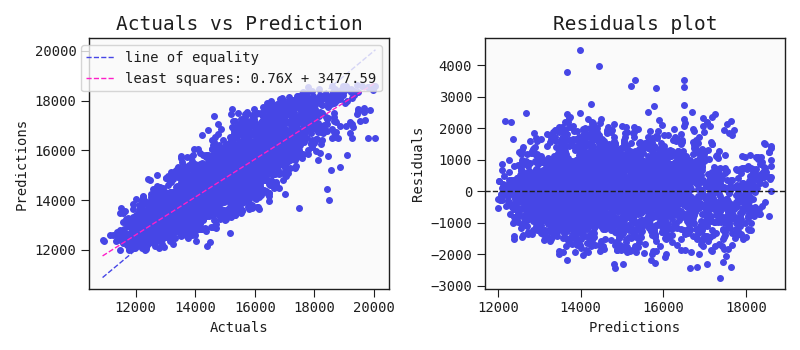

In [9]:
best.plot(qtest)

In [10]:
x = df_clean.loc[:, df_clean.columns != 'daily_demand'].values
y = df_clean.loc[:, 'daily_demand'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [11]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123)

xgb_r.fit(x_train, y_train) 

pred = xgb_r.predict(x_test) 

In [12]:
r_sq = metrics.r2_score(y_test,pred)

print(r_sq)

0.9376586961709448


In [13]:
xgb_mae = metrics.mean_absolute_error(y_test,pred)
xgb_mse = metrics.mean_squared_error(y_test,pred)
print(f'MAE: {xgb_mae}')
print(f'MSE: {xgb_mse}')

MAE: 330.1720830136447
MSE: 189828.40528958288


In [19]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [20]:
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
y_pred = rf_regressor.predict(x_test)

In [22]:
r_sq = metrics.r2_score(y_test,y_pred)
print(f"R^2 Score: {r_sq}")

R^2 Score: 0.9386621720957423


In [23]:
rf_mae = metrics.mean_absolute_error(y_test,y_pred)
rf_mse = metrics.mean_squared_error(y_test,y_pred)
print(f'MAE: {rf_mae}')
print(f'MSE: {rf_mse}')

MAE: 320.5696317186463
MSE: 186772.83501994025
